# 3.3 2040 Ïó¨ÏÑ±Îì§Ïùò Í±¥Í∞ï Í≥†ÎØº ÏÇ¥ÌîºÍ∏∞

In [2]:
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.4 MB 9.8 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.4 MB 8.7 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.4 MB 6.9 MB/s eta 0:00:03
   ---------- ----------------------------- 5.0/19.4 MB 5.9 MB/s eta 0:00:03
   ------------ --------------------------- 6.0/19.4 MB 5.7 MB/s eta 0:00:03
   -------------- ------------------------- 7.1/19.4 MB 5.6 MB/s eta 0:00:03
   ----------------- ---------------------- 8.7/19.4 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 10.2/19.4 MB 6.1 MB/s eta 0:00:02
   ----------------------- ---------------- 11.3/19.4 MB 6.0 MB/s eta 0:00:02
   ------------------------- -------------- 12.6/19.4 MB 6.0 MB/s eta 0:00:02
   ----------------------------- ---------- 14.2/19.4 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 15.5/19.4 MB 6.1 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install Jinja2


   -------------------- ------------------- 1/2 [Jinja2]
   -------------------- ------------------- 1/2 [Jinja2]
   -------------------- ------------------- 1/2 [Jinja2]
   ---------------------------------------- 2/2 [Jinja2]




[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import re # Ï†ïÍ∑ú ÌëúÌòÑÏãù

import pandas as pd 
import numpy as np

from kiwipiepy import Kiwi # ÌòïÌÉúÏÜå Î∂ÑÏÑù
from collections import Counter # Îã§ÎπàÎèÑ Îã®Ïñ¥ Î∂ÑÏÑù
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

import seaborn as sns

import calendar

from dateutil.parser import parse

from collections import Counter
from konlpy.tag import Komoran, Okt, Twitter
from pprint import pprint

'''filepath = './data'
df = pd.read_excel(filepath+"/2Ïû•_Ïó¨ÏÑ±Ïª§ÎÆ§ÎãàÌã∞Îç∞Ïù¥ÌÑ∞.xlsx")
df.head()'''

'filepath = \'./data\'\ndf = pd.read_excel(filepath+"/2Ïû•_Ïó¨ÏÑ±Ïª§ÎÆ§ÎãàÌã∞Îç∞Ïù¥ÌÑ∞.xlsx")\ndf.head()'

## 3.3.2 Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù: Í≤åÏãúÎ¨º ÎÇ†Ïßú Ï†ïÎ≥¥ Íµ¨ÌïòÍ∏∞

In [2]:
date_sample = "2022.02.26" 

print(parse(date_sample).year)
print(parse(date_sample).month)
print(parse(date_sample).day)

2022
2
26


In [3]:
df['year'] = df['date'].apply(lambda x:parse(x).year)
df['month'] = df['date'].apply(lambda x:parse(x).month)
df['day'] = df['date'].apply(lambda x:parse(x).day)

In [4]:
posting_days = []
for y, m, d in zip(df['year'], df['month'], df['day']):
    days = ['ÏõîÏöîÏùº', 'ÌôîÏöîÏùº', 'ÏàòÏöîÏùº', 'Î™©ÏöîÏùº', 'Í∏àÏöîÏùº', 'ÌÜ†ÏöîÏùº', 'ÏùºÏöîÏùº']
    day = days[calendar.weekday(y, m, d)]

    posting_days.append(day)

df['Date_Created'] = posting_days
df.sample(5)

title  replys views         date  year  month  day  \
8224             ÌÇ®ÎçîÎ∞∏Îü∞Ïä§Î•º Íµ¨ÏûÖÌñàÎäîÎç∞Ïöî       1    51  2020.02.21.  2020      2   21   
6860  ÎßåÏÑ±Ìé∏ÎèÑÏÑ†ÏóºÏπòÎ£å Ïù¥Ï†ú Í∑∏Îßå ÏïÑÌîÑÍ≥† Ïã∂Ïñ¥Ïöî„Ö†„Ö†       8   357  2020.06.01.  2020      6    1   
8528                 ÌîºÎ∂ÄÍ≥º Í∂ÅÍ∏àÌï¥Ïöî~       4   324  2020.01.31.  2020      1   31   
5802    9ÏõîÎ∂ÄÌÑ∞ ÏãúÏûëÎêú ÏïÑÌÜ†ÌîºÏôÄÏùò ÏÇ¨Ìà¨ „Ö†„Ö†..       6   178  2020.09.03.  2020      9    3   
5876          ÏßÑÎèô ÎßàÏÇ¨ÏßÄÍ±¥ Ìö®Í≥º ÏûàÏùÑÍπåÏöî?       6   547  2020.08.26.  2020      8   26   

     Date_Created  
8224          Í∏àÏöîÏùº  
6860          ÏõîÏöîÏùº  
8528          Í∏àÏöîÏùº  
5802          Î™©ÏöîÏùº  
5876          ÏàòÏöîÏùº

In [5]:
df['month'].value_counts().sort_index()

month
1     2117
2     1969
3     2169
4     1724
5     1319
6     1165
7     1149
8     1108
9      950
10     971
11    1021
12     997
Name: count, dtype: int64

In [6]:
df['Date_Created'].value_counts()

Date_Created
ÌôîÏöîÏùº    2981
ÏõîÏöîÏùº    2865
Î™©ÏöîÏùº    2792
ÏàòÏöîÏùº    2667
Í∏àÏöîÏùº    2580
ÏùºÏöîÏùº    1459
ÌÜ†ÏöîÏùº    1315
Name: count, dtype: int64

(0.0, 2500.0)

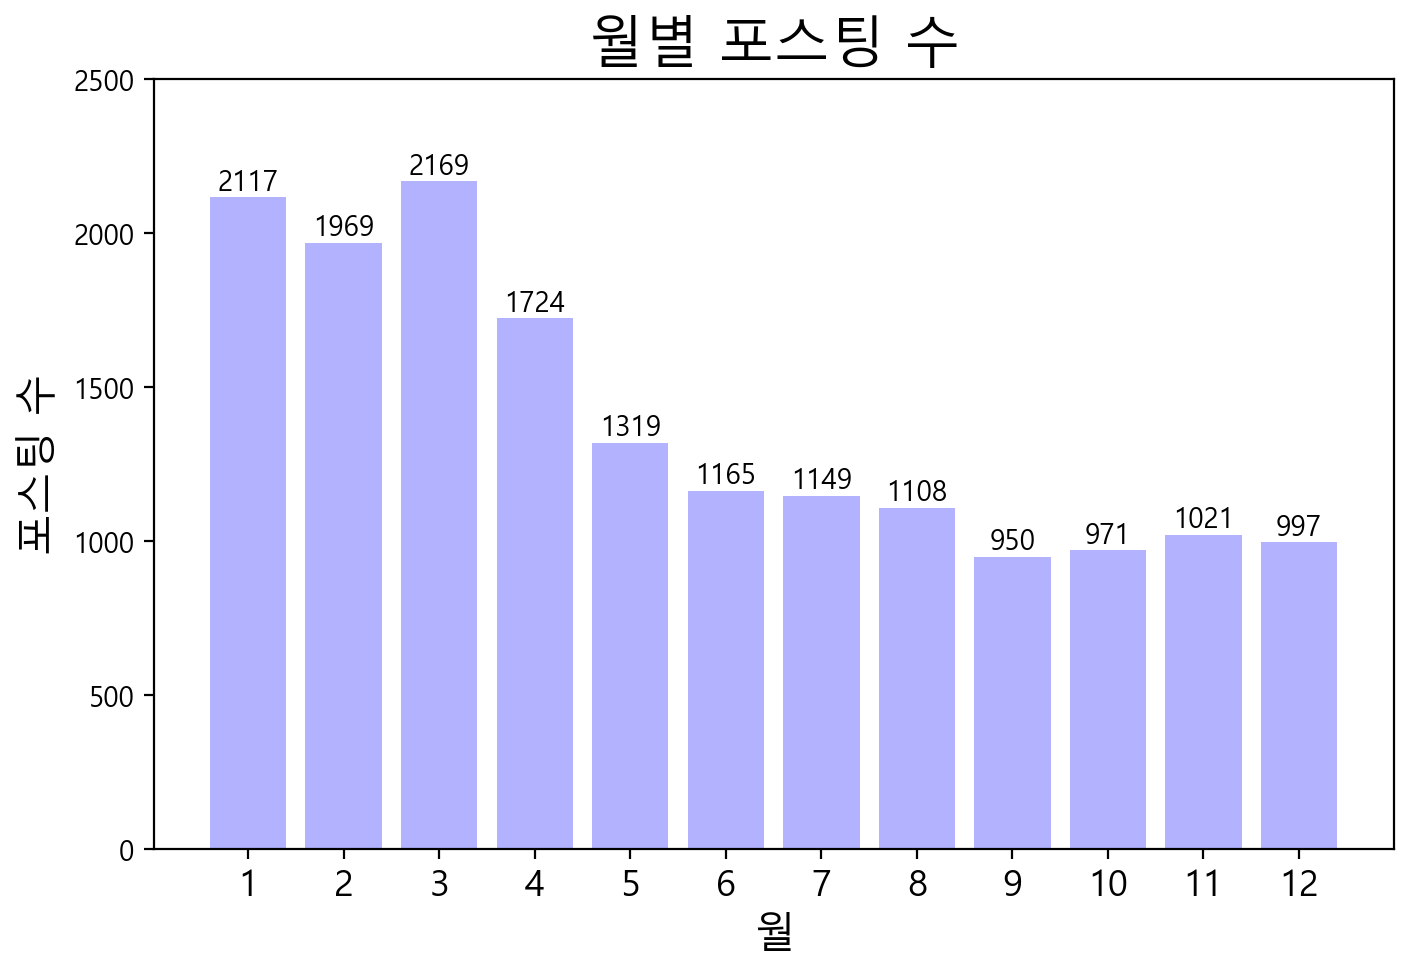

In [7]:
y = df['month'].value_counts().sort_index().values
x = np.arange(1, 13)
plt.figure(figsize=(8, 5))
plt.title("ÏõîÎ≥Ñ Ìè¨Ïä§ÌåÖ Ïàò", size=20)
plt.bar(x, y, color='blue', alpha=0.3)

for i, v in enumerate(x):
    plt.text(i+1, y[i], y[i], verticalalignment='bottom', horizontalalignment='center')

plt.xticks(np.arange(1, 13), size=13)

plt.xlabel("Ïõî", size=15)
plt.ylabel("Ìè¨Ïä§ÌåÖ Ïàò", size=15)
plt.ylim(0, 2500)

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù: Ìè¨Ïä§ÌåÖ Îû≠ÌÇπ Íµ¨ÌïòÍ∏∞

In [8]:
df['reply_rank'] = df['replys'].rank(ascending=False)
df.sort_values(by='reply_rank', ascending=True)

title  replys  views         date  \
1222                           Î¶¨ÌîÑÌåÖ ÏàòÏà† ÌõÑ ÏÇ¥Ïù¥ Ï∞åÎ©¥..     932   2.4Îßå  2021.11.27.   
12439                                         Ìéë     910  7,894  2019.05.06.   
13881                            ÎπÑÏóºÏóê Ï¢ãÎã§Ìï¥ÏÑú ÏßàÎ†ÄÏñ¥Ïöî~     635   1.1Îßå  2019.03.17.   
179         ÌîºÎ∂ÄÍ≥º ÏãúÏà† Ï¢ãÏïÑÌïòÍ≥† ÎßéÏù¥ Î∞õÏïÑÎ¥êÏÑú, Í∂ÅÍ∏àÌïúÍ±∞ ÏûàÏùå Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî!     612   1.6Îßå  2022.03.17.   
14562                        ÎπÑÏóºÏóê Ï¢ãÎã§Í≥† Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥Ñ~~~     560   1.4Îßå  2019.02.24.   
...                                         ...     ...    ...          ...   
13032  ÌïúÍµ≠ ÏΩúÎßàÏóêÏÑú ÎÇòÏò§Îäî Ï†úÍ∞ÄÏì∞Îäî Ïã†Ï†úÌíà ÌÅ¨Î¶ºÏù∏Îç∞ Ìï†Ïù∏ÌïúÎã§Í≥† Ìï¥ÏÑú Í≥µÏú†Ìï¥Ïöî~       0    105  2019.04.10.   
20                        ÎßàÌè¨Íµ¨,ÏùÄÌèâÍµ¨ pt ÏûòÌïòÎäîÍ≥≥ ÏïÑÏãúÎÇòÏöî?       0     14  2022.04.03.   
13068                                  ÏÜêÌÜ±Í¥ÄÎ¶¨Î¨∏Ïùò^^       0     22  2019.04.09.   
13072                           Ï†Ä Ïù¥Í±∞ Ïã†Ï≤≠ ÌñàÏñ¥Ïöî '_'       0    201  2019.04.09.   
16650      Lg ÌîÑÎùºÏóò Ïù∏ÏÑºÏãúÎ∏å Î©ÄÌã∞ÏºÄÏñ¥ vs Lg ÌîÑÎùºÏóò ÏïÑÏù¥ÏºÄÏñ¥ Í≥†ÎØº„Ö†„Ö†       0    177  2022.03.01.   

       year  month  day Date_Created  reply_rank  
1222   2021     11   27          ÌÜ†ÏöîÏùº         1.0  
12439  2019      5    6          ÏõîÏöîÏùº         2.0  
13881  2019      3   17          ÏùºÏöîÏùº         3.0  
179    2022      3   17          Î™©ÏöîÏùº         4.0  
14562  2019      2   24          ÏùºÏöîÏùº         5.0  
...     ...    ...  ...          ...         ...  
13032  2019      4   10          ÏàòÏöîÏùº     15587.5  
20     2022      4    3          ÏùºÏöîÏùº     15587.5  
13068  2019      4    9          ÌôîÏöîÏùº     15587.5  
13072  2019      4    9          ÌôîÏöîÏùº     15587.5  
16650  2022      3    1          ÌôîÏöîÏùº     15587.5  

[16659 rows x 9 columns]

In [9]:
def calc_View(count):
    """ÏûÖÎ†•Îêú Ï°∞Ìöå ÏàòÏóê Ï†ÄÏû•Îêú Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïúÎã§"""
    if 'Îßå' in count:
        cnt = float(count.replace("Îßå", ''))* 10000
        return cnt

    elif "," in count:
        cnt = float(count.replace(',',''))
        return cnt
    else:
        cnt = float(count)
        return cnt
    
df['views'] = df['views'].astype('str')
df['views'] = df['views'].apply(lambda x:calc_View(x))

df.head(3)


title  replys  views         date  year  \
0  Í∞ïÎÇ®Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ≤¥ÏÇ¥ÎπºÍ∏∞ ÏÖÄÎ£∞ÎùºÏù¥Ìä∏ Ï†úÍ±∞Î∂ÄÌÑ∞ ÌôïÏã§Ìûà ÎùºÏù∏Ïù¥ Îã¨ÎùºÏ°åÏñ¥Ïöî       2  391.0  2022.04.05.  2022   
1     Î∞úÎ†åÌã∞ÎÖ∏ Ïø†ÏÖòÍ≥º ÏûÖÏÉùÎ°úÎûë Ïø†ÏÖò ÎëêÍ∞ú Îã§ Ïç® Î≥¥Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî?       1  162.0  2022.04.05.  2022   
2                           ÎààÏçπ Î∞òÏòÅÍ∑ú Í∂ÅÍ∏àÌï¥Ïöî!       8   87.0  2022.04.05.  2022   

   month  day Date_Created  reply_rank  
0      4    5          ÌôîÏöîÏùº     12157.0  
1      4    5          ÌôîÏöîÏùº     13799.0  
2      4    5          ÌôîÏöîÏùº      5108.5

In [10]:
df['view_rank'] = df['views'].rank(ascending=False)
df.sort_values(by='view_rank', ascending=True)

title  replys     views  \
16471     ÌïÑÎèÖ!!! Ï†ïÏπòÍ∏ÄÍ∏àÏßÄ! Ï£ºÏùò / Î∂ÑÎûÄ, Ïù¥Ïäà, Ï†ïÏπò, Ïöï, Î∞òÎßêÎì± [Í∏Ä,ÎçßÍ∏Ä Í∏àÏßÄ]       0  560000.0   
16470              ÏßÑÌñâÏ§ë‚ñ∂ Ï≤¥ÌóòÎã®, Ïù¥Î≤§Ìä∏ ÏïàÎÇ¥ / 4Ïõî4Ïùº Î∂ÄÌÑ∞ ~ 4Ïõî10Ïùº ÍπåÏßÄ       0  420000.0   
281                                      ÍπÄÌòúÏàò ÏñºÎßàÎÇò ÏÜåÏãùÌïòÎäîÍ±∏ÍπåÏöî      66   28000.0   
107                                         Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136   26000.0   
16601                                       Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136   26000.0   
...                                                  ...     ...       ...   
4764                                ÌîÑÎ°úÏ∫Ñ Î†àÎìúÏóëÏä§ÌÅ¨Î¶ºÏûÖÏà†ÏóêÎ∞úÎùºÎèÑÎêòÎÇòÏöî?       0       6.0   
14770                        ÏïΩÏÇ∞ÏÑ± ÌÅ¥Î†åÏßï Íµ¨Îã¨ Ïπ¥Î†åÎëòÎùº Ìèº&Ìã∞Ïäà ÏàúÌï¥ÏÑú Ï¢ãÏïÑ       0       6.0   
14416                                ÎùºÎù†ÏóêÎùº ÏúÑÏπòÌïòÏ†§ ÏÑ∏Îüº Ï∂îÏ≤úÌï¥Ïöî^^       0       5.0   
12628                                  Ïã†ÏÇ¨Ïó≠Ïóê Ìó¨Ïä§Í¥úÏ∞ÆÏùÄ Í≥≥ ÏûàÎÇòÏö©?       0       4.0   
13471  Î¶¨ÏñºÎ≤†Î¶¨Ïñ¥::Ìè¨Îß®Ïò¨Ïù∏ÏõêÎØ∏Ïä§Ìä∏ÌÜ†ÎÑàÎ°ú Ïä§ÌÇ®ÏºÄÏñ¥Í∞Ä Í∑ÄÏ∞ÆÏùÄ ÎÇ®ÏûêÏπúÍµ¨ÏóêÍ≤å Îπ†Î•¥Í≥† Ìé∏Î¶¨ÌïòÍ≥† Ïàú...       0       4.0   

              date  year  month  day Date_Created  reply_rank  view_rank  
16471  2020.08.21.  2020      8   21          Í∏àÏöîÏùº     15587.5        1.0  
16470  2020.12.14.  2020     12   14          ÏõîÏöîÏùº     15587.5        2.0  
281    2022.03.04.  2022      3    4          Í∏àÏöîÏùº       115.5        3.0  
107    2022.03.24.  2022      3   24          Î™©ÏöîÏùº        36.5        4.5  
16601  2022.03.24.  2022      3   24          Î™©ÏöîÏùº        36.5        4.5  
...            ...   ...    ...  ...          ...         ...        ...  
4764   2020.12.20.  2020     12   20          ÏùºÏöîÏùº     15587.5    16655.0  
14770  2019.02.19.  2019      2   19          ÌôîÏöîÏùº     15587.5    16655.0  
14416  2019.02.28.  2019      2   28          Î™©ÏöîÏùº     15587.5    16657.0  
12628  2019.04.25.  2019      4   25          Î™©ÏöîÏùº     15587.5    16658.5  
13471  2019.03.28.  2019      3   28          Î™©ÏöîÏùº     15587.5    16658.5  

[16659 rows x 10 columns]

In [11]:
df["Rank"] = df['reply_rank'] + df['view_rank']
df.drop_duplicates(inplace = True)
df.sort_values(by='Rank', ascending=True)[:10]

title  replys    views         date  \
1222                      Î¶¨ÌîÑÌåÖ ÏàòÏà† ÌõÑ ÏÇ¥Ïù¥ Ï∞åÎ©¥..     932  24000.0  2021.11.27.   
1958                  Î¶¨ÌîÑÌåÖÏàòÏà†.... Ï∞êÏπúÎì§Ïùò Î∞òÏùë ‚Ä¶.     417  21000.0  2021.09.13.   
179    ÌîºÎ∂ÄÍ≥º ÏãúÏà† Ï¢ãÏïÑÌïòÍ≥† ÎßéÏù¥ Î∞õÏïÑÎ¥êÏÑú, Í∂ÅÍ∏àÌïúÍ±∞ ÏûàÏùå Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî!     612  16000.0  2022.03.17.   
38       Îì§Íπ®Í∞ÄÎ£®Îäî ÏÇ∞Ìå®Í∞Ä ÎÑàÎ¨¥ÎÇò Ïûò ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ï£ºÏùòÌïòÏÖîÏïº Ï¢ãÏäµÎãàÎã§     285  16000.0  2022.03.31.   
107                           Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136  26000.0  2022.03.24.   
14562                   ÎπÑÏóºÏóê Ï¢ãÎã§Í≥† Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥Ñ~~~     560  14000.0  2019.02.24.   
1684                    Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.   
5378            10ÎÖÑÏß∏ ÏïΩÍµ≠ÏóêÏÑú ÏùºÌïòÎ©¥ÏÑú Ï†úÏùº ÎßéÏù¥ Î∞õÏùÄ ÏßàÎ¨∏     125  18000.0  2020.10.22.   
1783                           ÌèâÏÉù Îã§Ïù¥Ïñ¥Ìä∏~~„Öú„Öú     197  14000.0  2021.09.30.   
881                     Í≥§ÏïΩ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ï†ïÎßêÎ°ú ÏúÑÌóòÌï©ÎãàÎã§     118  18000.0  2022.01.06.   

       year  month  day Date_Created  reply_rank  view_rank  Rank  
1222   2021     11   27          ÌÜ†ÏöîÏùº         1.0        6.0   7.0  
1958   2021      9   13          ÏõîÏöîÏùº         7.5        8.5  16.0  
179    2022      3   17          Î™©ÏöîÏùº         4.0       27.5  31.5  
38     2022      3   31          Î™©ÏöîÏùº        11.5       27.5  39.0  
107    2022      3   24          Î™©ÏöîÏùº        36.5        4.5  41.0  
14562  2019      2   24          ÏùºÏöîÏùº         5.0       41.0  46.0  
1684   2021     10   13          ÏàòÏöîÏùº        30.0       20.0  50.0  
5378   2020     10   22          Î™©ÏöîÏùº        42.0       15.0  57.0  
1783   2021      9   30          Î™©ÏöîÏùº        17.0       41.0  58.0  
881    2022      1    6          Î™©ÏöîÏùº        45.0       15.0  60.0

In [12]:
df.sort_values(by='Rank', ascending=True)[-10:]

title  replys  views  \
15818                             ÌéòÏù¥Ïä§ÌïÑÌã∞ÌïèÎü¨Ïï∞Ìîå Ï£ºÎ¶ÑÍ∞úÏÑ†Ïóê Îî±Ïù¥Ïïº~~~       0   10.0   
13119               ÏÖÄÎ†àÌîºÌä∏ ÎùºÏö¥Îìú Î©îÏù¥Ïª§ 10Ï¥à Ïò¨Ïù∏Ïõê ÏºÄÏñ¥ ÏâΩÍ≤å Í¥ÄÎ¶¨Ìï† Ïàò ÏûàÏñ¥Ïöî       0   10.0   
14868                    Ïî®Ïï§Ìä∏Î¶¨ ÎìÄÏñº, Ïä§ÌÇ§Îãà, ÌîΩÏÑú Í∏∞Îä•Ïùò ÎßàÏä§Ïπ¥Îùº 3Ï¢Ö ÎπÑÍµê       0    9.0   
1098   Î∞±ÌôîÏ†êÏóêÏÑú Íµ¨Îß§Ìïú Ï†úÌíàÏûÖÎãàÎã§ Ïπ¥ÌÜ°ÏÇ¨Í∏∞ ÎßéÏïÑÏöî Ìú¥ÎåÄÏ†ÑÌôîÎ≤àÌò∏ÏôÄ Ïù∏Ï†ÅÏÇ¨Ìï≠ ÌôïÏù∏ÌïòÍ≥† Í±∞ÎûòÌïòÏÑ∏Ïöî~       0    7.0   
14063                 Ïò§Í∞ÄÎãâ ÎçîÎßà Ïä§ÌÇ®ÏãúÍ∑∏ÎÑê ÏïÑÎØ∏ÎÖ∏ ÏÑ∏ÎüºÏúºÎ°ú ÎØºÍ∞êÏÑ± ÌîºÎ∂ÄÏóê ÏàòÎ∂ÑÏ∂©Ï†Ñ       0    7.0   
4764                                ÌîÑÎ°úÏ∫Ñ Î†àÎìúÏóëÏä§ÌÅ¨Î¶ºÏûÖÏà†ÏóêÎ∞úÎùºÎèÑÎêòÎÇòÏöî?       0    6.0   
14770                        ÏïΩÏÇ∞ÏÑ± ÌÅ¥Î†åÏßï Íµ¨Îã¨ Ïπ¥Î†åÎëòÎùº Ìèº&Ìã∞Ïäà ÏàúÌï¥ÏÑú Ï¢ãÏïÑ       0    6.0   
14416                                ÎùºÎù†ÏóêÎùº ÏúÑÏπòÌïòÏ†§ ÏÑ∏Îüº Ï∂îÏ≤úÌï¥Ïöî^^       0    5.0   
12628                                  Ïã†ÏÇ¨Ïó≠Ïóê Ìó¨Ïä§Í¥úÏ∞ÆÏùÄ Í≥≥ ÏûàÎÇòÏö©?       0    4.0   
13471  Î¶¨ÏñºÎ≤†Î¶¨Ïñ¥::Ìè¨Îß®Ïò¨Ïù∏ÏõêÎØ∏Ïä§Ìä∏ÌÜ†ÎÑàÎ°ú Ïä§ÌÇ®ÏºÄÏñ¥Í∞Ä Í∑ÄÏ∞ÆÏùÄ ÎÇ®ÏûêÏπúÍµ¨ÏóêÍ≤å Îπ†Î•¥Í≥† Ìé∏Î¶¨ÌïòÍ≥† Ïàú...       0    4.0   

              date  year  month  day Date_Created  reply_rank  view_rank  \
15818  2019.01.21.  2019      1   21          ÏõîÏöîÏùº     15587.5    16648.0   
13119  2019.04.08.  2019      4    8          ÏõîÏöîÏùº     15587.5    16648.0   
14868  2019.02.17.  2019      2   17          ÏùºÏöîÏùº     15587.5    16651.0   
1098   2021.12.13.  2021     12   13          ÏõîÏöîÏùº     15587.5    16652.5   
14063  2019.03.12.  2019      3   12          ÌôîÏöîÏùº     15587.5    16652.5   
4764   2020.12.20.  2020     12   20          ÏùºÏöîÏùº     15587.5    16655.0   
14770  2019.02.19.  2019      2   19          ÌôîÏöîÏùº     15587.5    16655.0   
14416  2019.02.28.  2019      2   28          Î™©ÏöîÏùº     15587.5    16657.0   
12628  2019.04.25.  2019      4   25          Î™©ÏöîÏùº     15587.5    16658.5   
13471  2019.03.28.  2019      3   28          Î™©ÏöîÏùº     15587.5    16658.5   

          Rank  
15818  32235.5  
13119  32235.5  
14868  32238.5  
1098   32240.0  
14063  32240.0  
4764   32242.5  
14770  32242.5  
14416  32244.5  
12628  32246.0  
13471  32246.0

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù: Ï£ºÏöî Ï£ºÏ†ú Ï∞æÍ∏∞


In [13]:
df['Rank'].describe()

count    15057.000000
mean     16633.189015
std       8464.842360
min          7.000000
25%       9938.500000
50%      16457.500000
75%      23261.000000
max      32246.000000
Name: Rank, dtype: float64

<Axes: ylabel='Rank'>

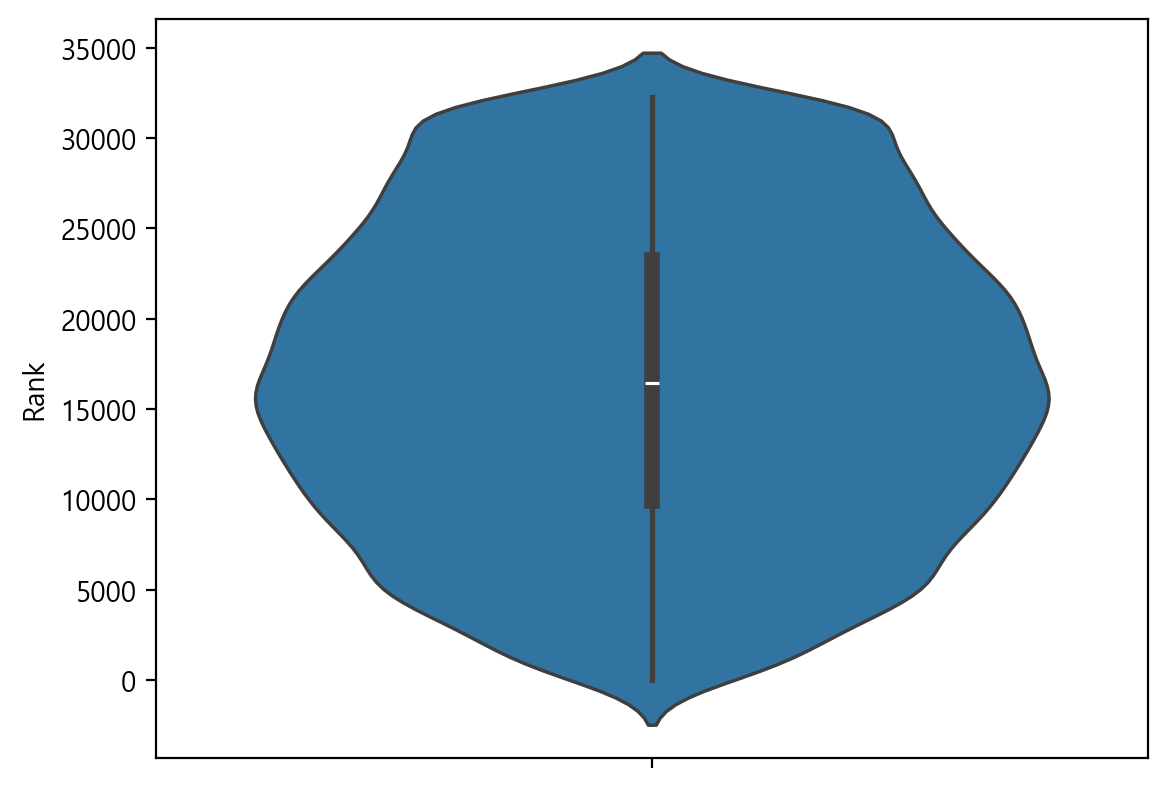

In [14]:
sns.violinplot(data=df, y='Rank')

In [15]:
df_under25 = df[df['Rank'] < 9983]

In [16]:
diet_keyword1 = 'Îã§Ïù¥Ïñ¥Ìä∏'
diet_keyword2 = 'Îã§Ïöî' 
diet_keyword3 = 'Îã§Ïöß' 

df_under25_diet = df_under25[(df_under25['title'].str.contains(diet_keyword1)) | \
                             (df_under25['title'].str.contains(diet_keyword2)) | \
                                (df_under25['title'].str.contains(diet_keyword3))]
df_under25_diet.sort_values(by="Rank")[:10]

title  replys    views         date  year  \
1684                 Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.  2021   
1783                        ÌèâÏÉù Îã§Ïù¥Ïñ¥Ìä∏~~„Öú„Öú     197  14000.0  2021.09.30.  2021   
881                  Í≥§ÏïΩ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ï†ïÎßêÎ°ú ÏúÑÌóòÌï©ÎãàÎã§     118  18000.0  2022.01.06.  2022   
2549        Îã§ÏößÏùÑ ÏÑ±Í≥µÌïòÍ≥†Î≥¥Îãà Îã§ÏößÏùÄ ÏÜåÏãùÌïòÎäîÍ≤å ÏïÑÎãàÎçîÎùºÍ≥†Ïöî     126  12000.0  2021.07.19.  2021   
11251                    Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÏù∏Í±∞Ï£†??^^     112  12000.0  2019.07.13.  2019   
5896          Îã§Ïù¥Ïñ¥Ìä∏ÌïúÏùòÏõê(Í∞ïÎÇ®ÌÉëorÏÑ†Ïù¥Í≥†ÏùÄ)Ï∂îÏ≤úÏ≤úÌï¥Ï£ºÏÑ∏Ïöî      78  13000.0  2020.08.25.  2020   
778    Îã§Ïù¥Ïñ¥Ìä∏ Ìï†Î†§Î©¥ Ïù¥Í≤ÉÎßåÌÅºÏùÄ Î¨¥Ï°∞Í±¥ ÎÅäÏñ¥ÏïºÌïúÎã§ ÎßêÌï¥Ï£ºÏÑ∏Ïöî„Öú„Öú     132   8809.0  2022.01.16.  2022   
16631       (ÏùºÏÉÅ) Í∞ÑÏ†àÌïú ÏßàÎ¨∏ : Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî?     156   8162.0  2022.03.22.  2022   
137         (ÏùºÏÉÅ) Í∞ÑÏ†àÌïú ÏßàÎ¨∏ : Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî?     156   8161.0  2022.03.22.  2022   
2209                    Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÏù¥ÌõÑÏóê Í∞ïÎ∞ï..      92   9364.0  2021.08.22.  2021   

       month  day Date_Created  reply_rank  view_rank   Rank  
1684      10   13          ÏàòÏöîÏùº        30.0       20.0   50.0  
1783       9   30          Î™©ÏöîÏùº        17.0       41.0   58.0  
881        1    6          Î™©ÏöîÏùº        45.0       15.0   60.0  
2549       7   19          ÏõîÏöîÏùº        41.0       60.0  101.0  
11251      7   13          ÌÜ†ÏöîÏùº        50.5       60.0  110.5  
5896       8   25          ÌôîÏöîÏùº        94.0       50.5  144.5  
778        1   16          ÏùºÏöîÏùº        39.0      111.0  150.0  
16631      3   22          ÌôîÏöîÏùº        26.0      126.0  152.0  
137        3   22          ÌôîÏöîÏùº        26.0      127.5  153.5  
2209       8   22          ÏùºÏöîÏùº        71.0       95.0  166.0

## ÌòïÌÉúÏÜå Î∂ÑÏÑù : Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [17]:
okt = Okt()
komoran = Komoran()
twitter = Twitter()

sample_text = "ÏòÅÏñëÏ†ú Î®πÏúºÎ©¥ÏÑú Í±∑Í∏∞ Ïö¥ÎèôÌïòÎãà ÏÇ¥Ïù¥ Îπ†Ï†∏Ïöî"

pprint(okt.pos(sample_text))
pprint(komoran.pos(sample_text))
pprint(twitter.pos(sample_text))

[('ÏòÅ', 'Modifier'),
 ('ÏñëÏ†ú', 'Noun'),
 ('Î®πÏúºÎ©¥ÏÑú', 'Verb'),
 ('Í±∑Í∏∞', 'Noun'),
 ('Ïö¥Îèô', 'Noun'),
 ('ÌïòÎãà', 'Verb'),
 ('ÏÇ¥Ïù¥', 'Noun'),
 ('Îπ†Ï†∏Ïöî', 'Verb')]
[('ÏòÅÏñëÏ†ú', 'NNG'),
 ('Î®π', 'VV'),
 ('ÏúºÎ©¥ÏÑú', 'EC'),
 ('Í±∑Í∏∞', 'NNP'),
 ('Ïö¥Îèô', 'NNG'),
 ('Ìïò', 'XSV'),
 ('Îãà', 'EC'),
 ('ÏÇ¥', 'NNB'),
 ('Ïù¥', 'JKS'),
 ('Îπ†ÏßÄ', 'VV'),
 ('Ïñ¥Ïöî', 'EC')]
[('ÏòÅ', 'Modifier'),
 ('ÏñëÏ†ú', 'Noun'),
 ('Î®πÏúºÎ©¥ÏÑú', 'Verb'),
 ('Í±∑Í∏∞', 'Noun'),
 ('Ïö¥Îèô', 'Noun'),
 ('ÌïòÎãà', 'Verb'),
 ('ÏÇ¥Ïù¥', 'Noun'),
 ('Îπ†Ï†∏Ïöî', 'Verb')]


In [18]:
komoran.nouns(sample_text)

['ÏòÅÏñëÏ†ú', 'Í±∑Í∏∞', 'Ïö¥Îèô', 'ÏÇ¥']

In [21]:
def get_text_only(text):
    """ÌïúÍ∏Ä, ÏòÅÏñ¥, Ïà´ÏûêÎßå Ï∂îÏ∂úÌïúÎã§"""
    tmp = re.compile('[Í∞Ä-Ìû£a-zA-Z0-9]+').findall(str(text))
    result = ' '.join(tmp)
    return result

text = "Îã§Ïù¥Ïñ¥Ìä∏ ÎèÑÏôÄÏ£ºÏÑ∏Ïöîü§ó Diet, 9kg Í∞êÎüâ Î™©Ìëú„Ö†"

In [22]:
result = get_text_only(text)
print(result)

Îã§Ïù¥Ïñ¥Ìä∏ ÎèÑÏôÄÏ£ºÏÑ∏Ïöî Diet 9kg Í∞êÎüâ Î™©Ìëú


In [23]:
df_under25_diet['re_title'] = df_under25_diet['title'].apply(lambda x:get_text_only(x))
df_under25_diet.sample(3)

title  replys   views         date  year  month  \
2240       Ï∂úÏÇ∞ ÌõÑ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ïñ¥ÎñªÍ≤åÎì§ ÌïòÏÖ®ÎÇòÏöî      13   333.0  2021.08.18.  2021      8   
2273   40ÎåÄÎ∂ÑÎì§ Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏãúÍ≥† Í≥ÑÏã†Í∞ÄÏöî?      17  1078.0  2021.08.13.  2021      8   
16518                 Îã§ÏößÌïòÏãúÎäîÎ∂ÑÎì§..      15   307.0  2022.04.02.  2022      4   

       day Date_Created  reply_rank  view_rank    Rank  \
2240    18          ÏàòÏöîÏùº      2457.5     6956.5  9414.0   
2273    13          Í∏àÏöîÏùº      1458.5     1290.0  2748.5   
16518    2          ÌÜ†ÏöîÏùº      1891.5     7574.5  9466.0   

                      re_title  
2240      Ï∂úÏÇ∞ ÌõÑ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ïñ¥ÎñªÍ≤åÎì§ ÌïòÏÖ®ÎÇòÏöî  
2273   40ÎåÄÎ∂ÑÎì§ Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏãúÍ≥† Í≥ÑÏã†Í∞ÄÏöî  
16518                  Îã§ÏößÌïòÏãúÎäîÎ∂ÑÎì§

In [24]:
diet_onesent = " ".join(df_under25_diet['re_title'].tolist())

nouns_diet = []
for noun in komoran.nouns(diet_onesent):
    if len(noun) > 1:
        nouns_diet.append(noun)
    else:
        continue

In [25]:
nouns_diet

['Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎïÖÏΩ© Î≤ÑÌÑ∞',
 'ÌõÑÍ∏∞',
 'Îã®Í∏∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïúÏïΩ',
 'ÏöîÌä∏',
 'ÏïÑÏπ®',
 'ÏãùÎã®',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ìà¨Ïûê',
 'ÎπÑÏö©',
 'ÏàòÏòÅ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎèÑÏõÄ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏùºÏÉÅ',
 'ÏßàÎ¨∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÑ±Í≥µ',
 'ÌÇ§Î°ú',
 'ÌïÑÎùºÌÖåÏä§',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ìö®Í≥º',
 'Ï≤¥Ï§ë',
 'Ï†ïÏ≤¥',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Î∞©Î≤ï',
 'Í≥µÏú†',
 'Î∂ÄÌÉÅ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏßàÎ¨∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÑ±Í≥µÏùò ÎπÑÎ∞Ä',
 'Í∞ëÏÉÅÏÑ†',
 'Í∏∞Îä•',
 'Ï†ÄÌïò',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎèÑÏ†Ñ',
 'ÌïúÏïΩ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ïã†Î∂Ñ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Í∞ÑÏãù',
 'Í≥ºÏùº',
 'ÌîÑÎ°ú',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Î≥¥Ï°∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïÑÎùºÌÖåÏä§',
 'Ìó¨Ïä§',
 'ÌïÑÏöî',
 'ÌïúÍ≥≥',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ï†êÌïë',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïúÏïΩ',
 'Î∂ÄÏûëÏö©',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ï†úÏùº',
 'Ïö¥Îèô',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏòÜÍµ¨Î¶¨',
 'ÏÇ¨ÏßÑ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÉùÎ¶¨',
 'ÏßÄÏó∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïòÏãúÎÇò',
 'Îã§Ï

In [26]:
Counter(nouns_diet).most_common()

[('Îã§Ïù¥Ïñ¥Ìä∏', 580),
 ('ÌïúÏïΩ', 68),
 ('Ìö®Í≥º', 41),
 ('ÏãùÎã®', 34),
 ('Ï∂îÏ≤ú', 28),
 ('ÏãúÏûë', 26),
 ('ÏÑ±Í≥µ', 25),
 ('Î∞©Î≤ï', 20),
 ('Ïö¥Îèô', 19),
 ('ÌÇ§Î°ú', 18),
 ('Ïã†Î∂Ñ', 16),
 ('ÏïΩÏÇ¨', 16),
 ('ÏïÑÏ§åÎßà', 15),
 ('Î≥¥Ï°∞', 14),
 ('ÏùºÏ∞®', 13),
 ('Í∞ÄÏöî', 13),
 ('ÌõÑÍ∏∞', 12),
 ('Í∞êÎüâ', 12),
 ('ÏùòÏõê', 12),
 ('Ïò§Îäò', 10),
 ('Î∂ÄÌÉÅ', 9),
 ('ÎÖ∏ÌïòÏö∞', 9),
 ('Í≥µÏú†', 8),
 ('Í∞úÏõî', 8),
 ('Ïú†ÏßÄ', 8),
 ('ÎèÑÏõÄ', 7),
 ('Îã®Í∏∞Í∞Ñ', 7),
 ('ÏßàÎ¨∏', 6),
 ('ÌïòÏãúÎÇò', 6),
 ('ÌèâÏÉù', 6),
 ('ÌïúÎ∞©', 6),
 ('ÏöîÌä∏', 5),
 ('ÌïÑÎùºÌÖåÏä§', 5),
 ('Ï†ïÏ≤¥', 5),
 ('Î∂ÄÏûëÏö©', 5),
 ('ÏöîÏ¶ò', 5),
 ('Í∞ÑÌóê', 5),
 ('Ï£ºÏ∞®', 5),
 ('Í≥†ÎØº', 5),
 ('ÏöîÏöî', 5),
 ('Îã®Í∏∞', 4),
 ('Ï≤¥Ï§ë', 4),
 ('Ï†êÌïë', 4),
 ('Ï†úÏùº', 4),
 ('ÎîîÌÜ°Ïä§', 4),
 ('ÏãùÏöï', 4),
 ('ÏÇ∞ÌõÑ', 4),
 ('Î™∏Î¨¥Í≤å', 4),
 ('Îã®Ïãù', 4),
 ('Ï°∞Ïñ∏', 4),
 ('Ï†ÄÎÖÅ', 4),
 ('ÏïÑÏπ®', 3),
 ('Í∞ÑÏãù', 3),
 ('Í±∑Í∏∞', 3),
 ('ÏãúÍ∞Ñ', 3),
 ('ÌÇ¨Î°ú', 3),
 ('Í±¥Í∞ï', 3),
 ('Î≥ëÏõê', 3),
 ('Ïù¥ÌõÑ', 3),
 (

In [27]:
pt_keyword1 = 'Ïö¥Îèô'
pt_keyword2 = 'ÌïÑÎùº'
pt_keyword3 = 'Ìó¨Ïä§'
pt_keyword4 = 'ÏöîÍ∞Ä'
pt_keyword5 = 'ÌîºÌã∞'
pt_keyword6 = 'PT'

df_under25_pt = df_under25[(df_under25['title'].str.contains(pt_keyword1)) | \
                           (df_under25['title'].str.contains(pt_keyword2)) | \
                            (df_under25['title'].str.contains(pt_keyword3)) | \
                            (df_under25['title'].str.contains(pt_keyword4)) | \
                            (df_under25['title'].str.contains(pt_keyword5)) | \
                            (df_under25['title'].str.contains(pt_keyword6))
                                    ]
df_under25_pt.sort_values(by='Rank')[:10]

title  replys    views         date  \
1684                        Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.   
1904                           ÌîºÌã∞Î∞õÏùÑÎïå Ìä∏Î†àÏù¥ÎÑàÎì§Ïù¥ ÏõêÎûò      71  14000.0  2021.09.18.   
3545                    ÌïÑÎùºÌÖåÏä§. ÌîºÌã∞ Î†àÍπÖÏä§ ÏûÖÏùÑÎïå Ìå¨Ìã∞ „Ö†„Ö†      56   9804.0  2021.04.13.   
918                         Í±∑Í∏∞Ïö¥Îèô 1ÏãúÍ∞ÑÏî© Îã§Ïù¥Ïñ¥Ìä∏ÎêòÎÇòÏöî?      68   8116.0  2022.01.03.   
10611                                ÌïÑÎùºÌÖåÏä§ Í∞ïÏÇ¨Ï†ÑÎßù      28   4768.0  2019.08.26.   
6323                         ÌïúÎã¨ÎèôÏïà Ïö¥Îèô ÏóÜÏù¥ ÏÇ¥ ÎπºÎ†§Î©¥Ïöî      29   1702.0  2020.07.17.   
10204  ÏÇ¥ ÎπºÎ†§Í≥† Îß§Ïùº Í±∑Í∏∞Ïö¥ÎèôÌïòÍ≥† ÏûàÏñ¥Ïöî~ Ïã§Ìå®ÏóÜÏù¥ ÏÑ±Í≥µÌïòÎäî ÎÖ∏ÌïòÏö∞ Î≠òÍπåÏöî?      32   1492.0  2019.09.27.   
8521            Ïù¥Îü∞ Îí∑ÌÉúÍ∞Ä Ï¢ãÏïÑÏßÄÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïñ¥Îñ§ Ïö¥ÎèôÏùÑÌï¥ÏïºÌï†ÍπåÏöî?„Ö†      24   1729.0  2020.02.01.   
7717                    Îã§Ïù¥Ïñ¥Ìä∏ Ï°∞Ïñ∏Ìï¥Ï£ºÏÑ∏Ïöî!Ïö¥ÎèôÌï¥ÎèÑ ÏïàÎπ†Ïßê..      59   1091.0  2020.03.31.   
4302                      Ìó¨Ïä§Ïû• PT Í∞ÄÍ≤©.. ÏõêÎûò Ïù¥Îü∞Í±¥Í∞ÄÏöî      17  12000.0  2021.02.03.   

       year  month  day Date_Created  reply_rank  view_rank    Rank  
1684   2021     10   13          ÏàòÏöîÏùº        30.0       20.0    50.0  
1904   2021      9   18          ÌÜ†ÏöîÏùº       100.5       41.0   141.5  
3545   2021      4   13          ÌôîÏöîÏùº       146.5       86.0   232.5  
918    2022      1    3          ÏõîÏöîÏùº       109.5      129.0   238.5  
10611  2019      8   26          ÏõîÏöîÏùº       491.5      243.0   734.5  
6323   2020      7   17          Í∏àÏöîÏùº       457.5      678.0  1135.5  
10204  2019      9   27          Í∏àÏöîÏùº       379.0      801.0  1180.0  
8521   2020      2    1          ÌÜ†ÏöîÏùº       704.5      660.0  1364.5  
7717   2020      3   31          ÌôîÏöîÏùº       137.5     1271.5  1409.0  
4302   2021      2    3          ÏàòÏöîÏùº      1458.5       60.0  1518.5

In [28]:
df_under25_pt['re_title'] = df_under25_pt['title'].apply(lambda x:get_text_only(x))
pt_onesent = " ".join(df_under25_pt['re_title'].tolist())
nouns_pt = [noun for noun in komoran.nouns(pt_onesent) if len(noun) > 1]
Counter(nouns_pt).most_common()[:10]

[('Ïö¥Îèô', 106),
 ('ÌïÑÎùºÌÖåÏä§', 47),
 ('Îã§Ïù¥Ïñ¥Ìä∏', 23),
 ('Ìö®Í≥º', 18),
 ('Ìó¨Ïä§', 15),
 ('ÏöîÍ∞Ä', 14),
 ('Í∏∞Íµ¨', 10),
 ('Ï†ïÎèÑ', 8),
 ('Í±∑Í∏∞', 7),
 ('Í∑ºÎ†•', 7)]

In [29]:
keyword1 = 'Ïö¥Îèô'
keyword2 = 'ÌïÑÎùº'
keyword3 = 'Îã§Ïù¥Ïñ¥Ìä∏'
keyword4 = 'Ìó¨Ïä§'
keyword5 = 'ÏöîÍ∞Ä'

df_under25_others = df_under25[~(df_under25['title'].str.contains(keyword1)) & \
                               ~(df_under25['title'].str.contains(keyword2)) & \
                                ~(df_under25['title'].str.contains(keyword3)) & \
                                    ~(df_under25['title'].str.contains(keyword4)) & \
                                        ~(df_under25['title'].str.contains(keyword5))]

df_under25_others['re_title'] = df_under25_others['title'].apply(lambda x:get_text_only(x))
other_onesent = " ".join(df_under25_others['re_title'].tolist())
nouns_other = [noun for noun in komoran.nouns(other_onesent) if len(noun) > 1]
Counter(nouns_other).most_common()[:60]

[('Ï∂îÏ≤ú', 202),
 ('Ìö®Í≥º', 129),
 ('ÌîºÎ∂Ä', 120),
 ('Í¥ÄÎ¶¨', 114),
 ('ÏàòÏà†', 102),
 ('Í∞ÄÏöî', 91),
 ('Ïã†Î∂Ñ', 75),
 ('ÌÅ¨Î¶º', 75),
 ('ÏßÄÎ∞©', 69),
 ('ÏñºÍµ¥', 67),
 ('Ï£ºÏÇ¨', 62),
 ('ÌÇ§Î°ú', 61),
 ('Ï£ºÎ¶Ñ', 50),
 ('Ïó¨ÎìúÎ¶Ñ', 50),
 ('Î∞©Î≤ï', 50),
 ('Í∏∞ÎØ∏', 49),
 ('ÏπòÎ£å', 47),
 ('Î∂ÄÌÉÅ', 46),
 ('Í≥†ÎØº', 43),
 ('ÎßàÏä§ÌÅ¨', 43),
 ('Ïú†ÏÇ∞', 43),
 ('Í∞ÄÏä¥', 42),
 ('ÌõÑÍ∏∞', 40),
 ('ÏãúÏà†', 40),
 ('Î†àÏù¥Ï†Ä', 39),
 ('ÎààÎ∞ë', 39),
 ('Î®∏Î¶¨', 39),
 ('Ï†úÍ±∞', 39),
 ('ÏÇ¨ÏßÑ', 38),
 ('ÌïÑÎü¨', 37),
 ('Î≥¥ÌÜ°Ïä§', 37),
 ('ÏßàÎ¨∏', 34),
 ('ÎïåÎ¨∏', 33),
 ('Î≥ëÏõê', 33),
 ('ÌîºÎ∂ÄÍ≥º', 32),
 ('ÌÉàÎ™®', 29),
 ('ÏòÅÏñëÏ†ú', 29),
 ('ÏÉ¥Ìë∏', 29),
 ('Î±ÉÏÇ¥', 27),
 ('ÌôîÏû•Ìíà', 27),
 ('Ïû¨Î∞∞', 26),
 ('ÏãùÏöï', 26),
 ('ÎààÏçπ', 26),
 ('Ìó§Ïñ¥', 26),
 ('ÏåçÏàò', 25),
 ('Í∞úÏõî', 25),
 ('30ÎåÄ', 25),
 ('ÎÇ®Ìé∏', 24),
 ('Î∂ÄÏûëÏö©', 24),
 ('ÎÖ∏ÌïòÏö∞', 24),
 ('ÏöîÏ¶ò', 24),
 ('Í∞êÎüâ', 24),
 ('ÏΩúÎùºÍ≤ê', 23),
 ('ÌïòÏãúÎÇò', 23),
 ('Îã®Ïãù', 23),
 ('ÏÇ¨Ïö©', 23),
 ('ÌåîÏûê',

In [30]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('Ïñ¥ÎñªÍ≤å', 95),
 ('Ï∂îÏ≤úÌï¥Ï£ºÏÑ∏Ïöî', 87),
 ('Î∂Ñ', 84),
 ('ÏûàÎÇòÏöî', 66),
 ('Ìö®Í≥º', 62),
 ('Ï¢Ä', 54),
 ('Í≥ÑÏã†Í∞ÄÏöî', 49),
 ('ÎÑàÎ¨¥', 47),
 ('ÏûàÏùÑÍπåÏöî', 46),
 ('Ï∂îÏ≤ú', 44),
 ('ÏßÑÏßú', 43),
 ('ÌîºÎ∂Ä', 41),
 ('ÌòπÏãú', 40),
 ('Ìï¥Î≥¥Ïã†Î∂Ñ', 37),
 ('ÏàòÏà†', 36),
 ('ÏñºÍµ¥', 35),
 ('Í¥ÄÎ¶¨', 35),
 ('Ïûò', 33),
 ('ÎßéÏù¥', 33),
 ('ÏïåÎ†§Ï£ºÏÑ∏Ïöî', 33),
 ('Î∂ÑÎì§', 33),
 ('ÌõÑ', 32),
 ('Ï¢ãÏùÄ', 32),
 ('ÌïòÏÑ∏Ïöî', 30),
 ('Î¥êÏ£ºÏÑ∏Ïöî', 29),
 ('Îçî', 29),
 ('Î≠êÍ∞Ä', 29),
 ('Îã§Îì§', 28),
 ('Î∞©Î≤ï', 27),
 ('Î≥¥ÌÜ°Ïä§', 27),
 ('Ïú†ÏÇ∞Í∑†', 27),
 ('Ï†Ä', 26),
 ('Î†àÏù¥Ï†Ä', 25),
 ('ÌîºÎ∂ÄÍ¥ÄÎ¶¨', 25),
 ('ÏÇ¥', 25),
 ('Ïñ¥Îñ§Í∞ÄÏöî', 25),
 ('ÏïÑÏãúÎäîÎ∂Ñ', 24),
 ('ÌõÑÍ∏∞', 23),
 ('ÏÇ¥Ïù¥', 23),
 ('Î¶¨ÌîÑÌåÖ', 23),
 ('ÏöîÏ¶ò', 23),
 ('Í∞ôÏïÑÏöî', 23),
 ('Ïñ¥Îñ§Í±∞', 23),
 ('Î∞õÍ≥†', 22),
 ('Í∏∞ÎØ∏', 22),
 ('ÏãúÏà†', 22),
 ('Ìï¥Ï£ºÏÑ∏Ïöî', 22),
 ('Ïó¨ÎìúÎ¶Ñ', 22),
 ('ÎààÎ∞ëÏßÄÎ∞©Ïû¨Î∞∞Ïπò', 21),
 ('ÌîºÎ∂ÄÍ≥º', 21),
 ('ÏòÅÏñëÏ†ú', 21),
 ('ÏäàÎßÅÌÅ¨', 21),
 ('ÌïòÏãúÎÇòÏö

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞: Ìä∏ÏúÑÌÑ∞

In [2]:
df_tweet = pd.read_excel('./data/Îã§Ïù¥Ïñ¥Ìä∏_Ìä∏Ïúó.xlsx')
df_tweet.sample(3)

Created At Hashtags  \
884  Sat Jun 04 01:13:54 +0000 2022       []   
257  Sat Jun 04 04:26:20 +0000 2022       []   
501  Sat Jun 04 03:12:03 +0000 2022       []   

                                                Tweets  
884  RT @_qazplm__: ÏµúÏû¨ÏÑ± Ïñ¥Îîî ÏïÑÌîàÍ∞Ä? Îã§Ïù¥Ïñ¥Ìä∏ÎùºÎèÑ Ìïú Í±¥Í∞Ä? ÏñºÍµ¥ ÏÇ¥Ïù¥ ...  
257               @unatulal ÎÇòÎûë Í∞ÄÏπò Ïù¥ÏßÄÏùÄ Îã§Ïù¥Ïñ¥Ìä∏ ÌóàÎ≤ÖÏßÄ ÎèåÎ†§ÍπéÍ∏∞ ÌïòÏûê  
501  ÏòàÎûÄ : Ìà¨Ïö∞Ìï† Îïå ÏÜåÎäî ÏÉâÏùÑ Íµ¨Î∂Ñ Î™ª ÌïúÎåÄ. Í∑∏Îü∞Îç∞ Ïôú Îπ®Í∞ÑÏÉâÏóê Ìù•Î∂ÑÌïúÎã§Îäî Î£®Î®∏Í∞Ä...

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : ÎßûÏ∂§Î≤ï ÍµêÏ†ï

In [33]:
!pip install cachetools


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from hanspell import spell_checker

text = "Ìï¥Î¥§Ïûê ÏïàÎèºÎäî Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏßÄÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇòÎ®πÏûê"
print(spell_checker.check(text))

Checked(result=True, original='Ìï¥Î¥§Ïûê ÏïàÎèºÎäî Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏßÄÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇòÎ®πÏûê', checked='Ìï¥Î¥§Ïûê ÏïàÎêòÎäî Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ ÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇò Î®πÏûê', errors=3, words=OrderedDict([('Ìï¥Î¥§Ïûê', 0), ('ÏïàÎêòÎäî', 1), ('Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ', 2), ('ÎßêÍ≥†', 2), ('Ï†ÄÎÖÅÏù¥ÎÇò', 2), ('Î®πÏûê', 2)]), time=0.3158299922943115)


In [4]:
print(spell_checker.check(text).checked)

Ìï¥Î¥§Ïûê ÏïàÎêòÎäî Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ ÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇò Î®πÏûê


In [5]:
def get_kor_text(text):
    """ÌïúÍ∏ÄÎßå Ï∂îÏ∂úÌïúÎã§"""
    tmp = re.compile('[Í∞Ä-Ìû£]+').findall(str(text))

    result = ' '.join(tmp)

    return result

df_tweet['re_Tweet'] = df_tweet['Tweets'].apply(lambda x:get_kor_text(x))
df_tweet.sample(3)

Created At  \
734  Sat Jun 04 02:01:59 +0000 2022   
715  Sat Jun 04 02:06:40 +0000 2022   
242  Sat Jun 04 04:30:23 +0000 2022   

                                              Hashtags  \
734                                                 []   
715                                                 []   
242  [{'text': 'WithYou', 'indices': [85, 93]}, {'t...   

                                                Tweets  \
734  ÏïÑÎãà Ïôú ÏûêÍæ∏ ÎÇ¥Í∞Ä Ïö¥ÎèôÌïòÎäîÍ±∏ Îã§Ïù¥Ïñ¥Ìä∏Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÎäîÎç∞ ÎÇú Í∞ïÌï¥ÏßÄÍ≥†Ïã∂Ïñ¥ÏÑú ÌïòÎäîÍ±∞Îùº...   
715  Î∞∞Î≥ÄÌôúÎèô Îã§Ïù¥Ïñ¥Ìä∏ Î≥¥Ï°∞Ï†ú Í∞ÄÎ•¥ÏãúÎãàÏïÑ Ï∞®Ï†ÑÏûêÌîº ÏπºÎ°úÎ¶¨ Ïª∑ÌåÖÏ†ú ÌÉÑÏàòÌôîÎ¨º Î≥¥Ï°∞Ï†ú ÎÇ¥Ïû•ÏßÄÎ∞©...   
242  RT @angeljimin1313: ÏßÄÎØºÏïÑ ÎààÏïÑ Ïò§ÎäòÎèÑ Îã§Ïù¥Ïñ¥Ìä∏ Ïã§Ìå®Îã§ ÏßÄÎØºÏù¥ ÏÇ¨ÏßÑ...   

                                              re_Tweet  
734  ÏïÑÎãà Ïôú ÏûêÍæ∏ ÎÇ¥Í∞Ä Ïö¥ÎèôÌïòÎäîÍ±∏ Îã§Ïù¥Ïñ¥Ìä∏Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÎäîÎç∞ ÎÇú Í∞ïÌï¥ÏßÄÍ≥†Ïã∂Ïñ¥ÏÑú ÌïòÎäîÍ±∞Îùº...  
715  Î∞∞Î≥ÄÌôúÎèô Îã§Ïù¥Ïñ¥Ìä∏ Î≥¥Ï°∞Ï†ú Í∞ÄÎ•¥ÏãúÎãàÏïÑ Ï∞®Ï†ÑÏûêÌîº ÏπºÎ°úÎ¶¨ Ïª∑ÌåÖÏ†ú ÌÉÑÏàòÌôîÎ¨º Î≥¥Ï°∞Ï†ú ÎÇ¥Ïû•ÏßÄÎ∞©...  
242                ÏßÄÎØºÏïÑ ÎààÏïÑ Ïò§ÎäòÎèÑ Îã§Ïù¥Ïñ¥Ìä∏ Ïã§Ìå®Îã§ ÏßÄÎØºÏù¥ ÏÇ¨ÏßÑÎ≥¥Í≥† Îçî ÎÖ∏Î†•Ìï†Í≤å

In [6]:
def checkGrammer(text):
    """ÎßûÏ∂§Î≤ï ÍµêÏ†ï"""

    txt = spell_checker.check(text)
    result = txt.checked

    return result

df_tweet['check_Tweet'] = df_tweet['re_Tweet'].apply(lambda x:checkGrammer(x))
df_tweet.sample(3)

Created At  \
669  Sat Jun 04 02:18:00 +0000 2022   
542  Sat Jun 04 03:00:09 +0000 2022   
990  Sat Jun 04 00:48:17 +0000 2022   

                                              Hashtags  \
669  [{'text': 'rt', 'indices': [19, 22]}, {'text':...   
542                                                 []   
990              [{'text': 'RT', 'indices': [13, 16]}]   

                                                Tweets  \
669  RT @rj0323_js0205: #rt + #follow \nÎã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÌïòÎ©¥ 1...   
542  P6ZX8HV5MGBIR74\n\nÏßÄÌçºÌè¨Ïºì\nÌï¥Ïô∏Ïó¨Ìñâ\nÎåÄÍµ¨ÌÅ¥ÎüΩ\nÏ¢ãÏïÑÏöî\nÎã§Ïù¥Ïñ¥Ìä∏...   
990  RT @jetttii: #RT \n\nÏûòÌïòÎã§Í∞Ä ÏöîÏ¶ò Îòê Ìè≠Ïãù ÌÑ∞Ï†∏ÏÑú.. Ïù¥ÎåÄÎ°ú Í∞ÄÎã§...   

                                              re_Tweet  \
669                 Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÌïòÎ©¥ ÎìúÎ†§Ïöî ÏõêÌïòÎäî ÎßåÌÅº Î∫êÏùÑ Îïå Î∞îÎ°ú ÎãπÎ∞úÌï†Í≤åÏöî   
542  ÏßÄÌçºÌè¨Ïºì Ìï¥Ïô∏Ïó¨Ìñâ ÎåÄÍµ¨ÌÅ¥ÎüΩ Ï¢ãÏïÑÏöî Îã§Ïù¥Ïñ¥Ìä∏Ïñ∏Ï†úÌïòÎÉêÍ∑∏Îû® ÏÇ¥Îî∏ Ïó¨Ïπú Îì±ÏÇ∞ Ï∂ïÌïò ÎìúÎ°úÏûâ ...   
990  ÏûòÌïòÎã§Í∞Ä ÏöîÏ¶ò Îòê Ìè≠Ïãù ÌÑ∞Ï†∏ÏÑú Ïù¥ÎåÄÎ°ú Í∞ÄÎã§Í∞Ñ Îòê Ïã§Ìå®Ìï†ÍπåÎ¥ê ÍπåÏßÄ Ïù¥ÏÉÅ Î™ªÎπºÎ©¥ Ï∂îÏ≤® ...   

                                           check_Tweet  
669                Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÌïòÎ©¥ ÎìúÎ†§Ïöî ÏõêÌïòÎäî ÎßåÌÅº Î∫êÏùÑ Îïå Î∞îÎ°ú Îãπ Î∞úÌï†Í≤åÏöî  
542  ÏßÄÌçº Ìè¨Ïºì Ìï¥Ïô∏Ïó¨Ìñâ ÎåÄÍµ¨ÌÅ¥ÎüΩ Ï¢ãÏïÑÏöî Îã§Ïù¥Ïñ¥Ìä∏ Ïñ∏Ï†ú ÌïòÎÉê Í∑∏Îüº ÏÇ¥ Îî∏ Ïó¨ÏûêÏπúÍµ¨ Îì±ÏÇ∞ ...  
990  ÏûòÌïòÎã§Í∞Ä ÏöîÏ¶ò Îòê Ìè≠Ïãù ÌÑ∞Ï†∏ÏÑú Ïù¥ÎåÄÎ°ú Í∞ÄÎã§Í∞Ñ Îòê Ïã§Ìå®Ìï†Íπå Î¥êÍπåÏßÄ Ïù¥ÏÉÅ Î™ª ÎπºÎ©¥ Ï∂îÏ≤®...

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [7]:
from konlpy.tag import Komoran

komoran = Komoran()
df_tweet.drop_duplicates(subset='check_Tweet', inplace=True)

tweet_onesent = " ".join(df_tweet['check_Tweet'].to_list())

nouns_tweets = [noun for noun in komoran.nouns(tweet_onesent) if len(noun) > 1]
print(nouns_tweets[:3])

['ÏóÑÎßà', 'Îã§Ïù¥Ïñ¥Ìä∏', 'ÏûîÏÜåÎ¶¨']


## Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù: nGram

In [10]:
def getGram(tokens, n):
    """Î∂ÑÏ†àÎêú Îã®Ïñ¥Î•º Ï†ÑÎã¨ÌïòÎ©¥ nGramÏùÑ Î∞òÌôò"""
    bigrams = []

    for i in range(0, int(len(tokens)/n)):
        bigrams.append(tokens[i:i+n])

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result
n2gram_result = getGram(tokens=nouns_tweets, n=2)
n3gram_result = getGram(tokens=nouns_tweets, n=3)

display(n2gram_result[:15])
display(n3gram_result[:15])

nGram  count
0   Îã§Ïù¥Ïñ¥Ìä∏ Îã§Ïù¥Ïñ¥Ìä∏     25
1       ÏïåÎ∞î ÏßÅÏõê      9
2       ÏßÅÏõê ÏïåÎ∞î      9
3     Îã§Ïù¥Ïñ¥Ìä∏ ÏãúÏûë      8
4     Í∞ïÏ†ú Îã§Ïù¥Ïñ¥Ìä∏      7
5     Îã§Ïù¥Ïñ¥Ìä∏ ÏãùÎã®      7
6       ÌôúÎèô ÏùºÌôò      6
7       Ïø†Ìå° ÌôúÎèô      6
8     Îã§Ïù¥Ïñ¥Ìä∏ Í∞ÑÏãù      6
9     Îã§Ïù¥Ïñ¥Ìä∏ Ïö¥Îèô      5
10    Îã§Ïù¥Ïñ¥Ìä∏ ÏùåÏãù      5
11    Îã§Ïù¥Ïñ¥Ìä∏ Í∑∏Îû®      5
12    Í±¥Í∞ï Îã§Ïù¥Ïñ¥Ìä∏      4
13      Ïä§ÌÉÄ Í∑∏Îû®      4
14    Îã§Ïù¥Ïñ¥Ìä∏ ÏöîÏ¶ò      4

nGram  count
0       ÏïåÎ∞î ÏßÅÏõê ÏïåÎ∞î      6
1       Ïø†Ìå° ÌôúÎèô ÏùºÌôò      4
2     ÏùºÌôò ÏùºÏ†ïÏï° ÏàòÏàòÎ£å      3
3      ÌôúÎèô ÏùºÌôò ÏùºÏ†ïÏï°      3
4     ÏùºÏ†ïÏï° ÏàòÏàòÎ£å Ï†úÍ≥µ      3
5       ÏÉÅÌíà ÎßÅÌÅ¨ Ïä§ÌåÖ      2
6       ÎßÅÌÅ¨ Ïä§ÌåÖ Ïø†Ìå°      2
7       Ïä§ÌåÖ Ïø†Ìå° ÌôúÎèô      2
8     ÏùåÏãù Îã§Ïù¥Ïñ¥Ìä∏ ÏùåÏãù      2
9     Îã§Ïù¥Ïñ¥Ìä∏ ÏïåÎ∞î ÏßÅÏõê      2
10  Îã§Ïù¥Ïñ¥Ìä∏ ÏöîÏ¶ò Îã§Ïù¥Ïñ¥Ìä∏      2
11    Îã§Ïù¥Ïñ¥Ìä∏ Î±ÉÏÇ¥ Ïö¥Îèô      2
12      Î±ÉÏÇ¥ Ïö¥Îèô Î±ÉÏÇ¥      2
13      Ïö¥Îèô Î±ÉÏÇ¥ Ï†úÍ±∞      2
14    Ïù∏ÏßÄ Îã§Ïù¥Ïñ¥Ìä∏ Î≥¥Ï°∞      1

In [11]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
def find_nouns_verb_adject(text):
    """ÏûÖÎ†•Îêú Î¨∏Ïû•ÏóêÏÑú Î™ÖÏÇ¨, ÎèôÏÇ¨ Ï∂îÏ∂úÌï¥ Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôò"""
    tokens = kiwi.tokenize(text)

    target_idxs = []
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)
                target_idxs.append('noun')
        elif wrd.tag.startswith("V"):
            tmp_form = wrd.form + "Îã§" 
            target_words.append(tmp_form)
            target_idxs.append('verb')
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """Î¨∏Ïû• ÎÇ¥ ÏùòÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îã®Ïñ¥Î•º Ï∂îÏ∂úÌïúÎã§"""
    intensions = []
    for idx, tag in enumerate(words_tag):
        try:
            if tag == 'verb':
                word = "".join(word[idx-1:idx+1])
                intensions.append(word)
            elif(tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    return intensions

def find_intension(text):
    """ÏûÖÎ†•Îêú Î¨∏Ïû•ÏóêÏÑú ÏùòÎèÑÎ•º Ï∞æÏïÑÏÑú Î∞òÌôòÌïúÎã§"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return intensions

In [12]:
one_intension = find_intension(tweet_onesent)

In [13]:
intension_n2gram_result = getGram(tokens=one_intension, n=2)
intension_n3gram_result = getGram(tokens=one_intension, n=3)

display(intension_n2gram_result[:15])
display(intension_n3gram_result[:15])

nGram  count
0       ÌïòÎã§ ÌïòÎã§     17
1       Ïù¥Îã§ Ïù¥Îã§     15
2     Ïù¥Îã§ Îã§Ïù¥Ïñ¥Ìä∏     13
3       ÌïòÎã§ Ïù¥Îã§     12
4       Î®πÎã§ Ïã∂Îã§      9
5       ÌïòÎã§ ÏûàÎã§      9
6     Îã§Ïù¥Ïñ¥Ìä∏ Ïù¥Îã§      9
7       Ïù¥Îã§ ÌïòÎã§      9
8      ÏïåÎ∞î Íµ¨ÌïòÎã§      9
9     Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÎã§      9
10  Îã§Ïù¥Ïñ¥Ìä∏ Îã§Ïù¥Ïñ¥Ìä∏      7
11      ÌïòÎã§ Î®πÎã§      7
12     Íµ¨ÌïòÎã§ ÏïåÎ∞î      7
13    Ïø†Ìå° ÌååÌä∏ÎÑàÏä§      6
14    ÌååÌä∏ÎÑàÏä§ ÌôúÎèô      6

nGram  count
0     ÌååÌä∏ÎÑàÏä§ ÌôúÎèô Îî∞Î•¥Îã§      4
1      Ïø†Ìå° ÌååÌä∏ÎÑàÏä§ ÌôúÎèô      4
2       ÏïåÎ∞î Íµ¨ÌïòÎã§ ÏïåÎ∞î      4
3      ÌôúÎèô Îî∞Î•¥Îã§ ÏùºÏ†ïÏï°      3
4     Îî∞Î•¥Îã§ ÏùºÏ†ïÏï° ÏàòÏàòÎ£å      3
5      ÏùºÏ†ïÏï° ÏàòÏàòÎ£å Î∞õÎã§      3
6     Ìè¨Ïä§ÌåÖ Ïø†Ìå° ÌååÌä∏ÎÑàÏä§      2
7        ÏûàÎã§ ÌïòÎã§ ÏûàÎã§      2
8        Î¨ªÎã§ Î≥¥Îã§ Ïù¥Îã§      2
9   Í∞ÄÎ•¥ÏãúÎãàÏïÑ Îã§Ïù¥Ïñ¥Ìä∏ Ï∂îÏ≤ú      2
10  Îã§Ïù¥Ïñ¥Ìä∏ Ï∂îÏ≤ú Í∞ÄÎ•¥ÏãúÎãàÏïÑ      2
11      ÏÉÅÌíà ÎßÅÌÅ¨ Ìè¨Ïä§ÌåÖ      2
12     ÏùåÏãù Îã§Ïù¥Ïñ¥Ìä∏ ÏùåÏãù      2
13      ÎßÅÌÅ¨ Ìè¨Ïä§ÌåÖ Ïø†Ìå°      2
14       ÎêòÎã§ Ïù¥Îã§ ÌïòÎã§      2

## 3.3.10 Íµ≠ÎØºÍ±¥Í∞ïÎ≥¥ÌóòÍ≥µÎã®ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÏßÑÎ£å ÎÇ¥Ïó≠ Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [14]:
df = pd.read_csv('./data/2020ÎÖÑ_ÏßÑÎ£åÏ†ïÎ≥¥_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv')
df.head(2)

ÏÑ±Î≥ÑÏΩîÎìú  Ïó∞Î†πÎåÄÏΩîÎìú  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú Ï£ºÏÉÅÎ≥ëÏΩîÎìú Î∂ÄÏÉÅÎ≥ëÏΩîÎìú  Ï¥ùÏ≤òÎ∞©ÏùºÏàò  Ïã¨Í≤∞Î≥∏Ïù∏Î∂ÄÎã¥Í∏à  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú_str ÏßÑÎ£åÍ≥ºÎ™©  \
0     1     17       1  I109  E785      0     1500           1   ÎÇ¥Í≥º   
1     1     17       1  I109  E785      7     1500           1   ÎÇ¥Í≥º   

                 ÏßÑÎã®Î≥ëÎ™Ö ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ  
0  Í∏∞ÌÉÄ Î∞è ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÏõêÎ∞úÏÑ± Í≥†ÌòàÏïï  ÎÇ®  80ÎåÄ  
1  Í∏∞ÌÉÄ Î∞è ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÏõêÎ∞úÏÑ± Í≥†ÌòàÏïï  ÎÇ®  80ÎåÄ

In [15]:
selct_cols = ['ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÏßÑÎ£åÍ≥ºÎ™©', 'ÏßÑÎã®Î≥ëÎ™Ö']
df_selct = df[selct_cols]

df_female = df_selct[(df_selct['ÏÑ±Î≥Ñ']=='Ïó¨')& \
                     ((df_selct['Ïó∞Î†πÎåÄ']=='20ÎåÄ') |\
                      (df_selct['Ïó∞Î†πÎåÄ']=='30ÎåÄ') |\
                        (df_selct['Ïó∞Î†πÎåÄ']=='40ÎåÄ') |\
                            (df_selct['Ïó∞Î†πÎåÄ']=='50ÎåÄ'))]
df_female.sample(5)

ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ   ÏßÑÎ£åÍ≥ºÎ™©                    ÏßÑÎã®Î≥ëÎ™Ö
6639522  Ïó¨  20ÎåÄ     Ïô∏Í≥º    Í∂§Ïñë ÎòêÎäî ÏóºÏ¶ùÏù¥ ÏóÜÎäî ÌïòÏßÄÏùò Ï†ïÎß•Î•ò
9301853  Ïó¨  50ÎåÄ     ÎÇ¥Í≥º  Ìï©Î≥ëÏ¶ùÏùÑ ÎèôÎ∞òÌïòÏßÄ ÏïäÏùÄ ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÎãπÎá®Î≥ë
1006750  Ïó¨  20ÎåÄ  Ïù¥ÎπÑÏù∏ÌõÑÍ≥º            ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÏïåÎ†àÎ•¥Í∏∞ÎπÑÏóº
3535793  Ïó¨  50ÎåÄ   Ï†ïÌòïÏô∏Í≥º   ÌåîÍøàÏπòÏùò ÏÉÅÏÑ∏Î∂àÎ™Ö Î∂ÄÎ∂ÑÏùò ÏóºÏ¢å Î∞è Í∏¥Ïû•
3504724  Ïó¨  40ÎåÄ     ÎÇ¥Í≥º                    ÏïåÏàòÏóÜÏùå

In [16]:
df_female_ca = pd.pivot_table(data=df_female, values='ÏßÑÎã®Î≥ëÎ™Ö', aggfunc='count', index='ÏßÑÎ£åÍ≥ºÎ™©', columns='Ïó∞Î†πÎåÄ')
df_female_ca.sort_values(by='20ÎåÄ', ascending=False).head(10)

Ïó∞Î†πÎåÄ          20ÎåÄ       30ÎåÄ       40ÎåÄ       50ÎåÄ
ÏßÑÎ£åÍ≥ºÎ™©                                          
ÎÇ¥Í≥º       95620.0  134645.0  211344.0  377619.0
ÏÇ∞Î∂ÄÏù∏Í≥º     75011.0  125792.0   76641.0   59789.0
Ï†ïÌòïÏô∏Í≥º     52167.0   68929.0  133092.0  259573.0
Ïù¥ÎπÑÏù∏ÌõÑÍ≥º    48287.0   71874.0   71711.0   75122.0
ÌîºÎ∂ÄÍ≥º      46510.0   40332.0   45657.0   51417.0
ÏïàÍ≥º       33327.0   33712.0   48359.0   79775.0
Ï†ïÏã†Í±¥Í∞ïÏùòÌïôÍ≥º  30550.0   28909.0   31831.0   33186.0
Ïô∏Í≥º       12089.0   17755.0   31028.0   46265.0
ÎπÑÎá®Í∏∞Í≥º     10169.0   11482.0   17345.0   23770.0
ÏùëÍ∏âÏùòÌïôÍ≥º     8170.0    6767.0    6841.0    8200.0

In [21]:
df_female_ca_1 = df_female_ca.reset_index()

df_female_ca_20 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©', '20ÎåÄ']].sort_values(by='20ÎåÄ', ascending=False)[:10]
df_female_ca_30 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©', '30ÎåÄ']].sort_values(by='30ÎåÄ', ascending=False)[:10]
df_female_ca_40 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©', '40ÎåÄ']].sort_values(by='40ÎåÄ', ascending=False)[:10]
df_female_ca_50 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©', '50ÎåÄ']].sort_values(by='50ÎåÄ', ascending=False)[:10]

df_female_ca_2030 = pd.merge(df_female_ca_20, df_female_ca_30, on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer')
df_female_ca_2040 = pd.merge(df_female_ca_2030, df_female_ca_40, on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer')
df_female_ca_2050 = pd.merge(df_female_ca_2040, df_female_ca_50, on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer')

df_female_ca_2050.head(10)

Ïó∞Î†πÎåÄ     ÏßÑÎ£åÍ≥ºÎ™©      20ÎåÄ       30ÎåÄ       40ÎåÄ       50ÎåÄ
0      Í∞ÄÏ†ïÏùòÌïôÍ≥º      NaN   11211.0   18972.0   33302.0
1         ÎÇ¥Í≥º  95620.0  134645.0  211344.0  377619.0
2       ÎπÑÎá®Í∏∞Í≥º  10169.0   11482.0   17345.0       NaN
3       ÏÇ∞Î∂ÄÏù∏Í≥º  75011.0  125792.0   76641.0   59789.0
4       Ïã†Í≤ΩÏô∏Í≥º      NaN       NaN       NaN   27654.0
5         ÏïàÍ≥º  33327.0   33712.0   48359.0   79775.0
6         Ïô∏Í≥º  12089.0   17755.0   31028.0   46265.0
7      ÏùëÍ∏âÏùòÌïôÍ≥º   8170.0       NaN       NaN       NaN
8      Ïù¥ÎπÑÏù∏ÌõÑÍ≥º  48287.0   71874.0   71711.0   75122.0
9    Ï†ïÏã†Í±¥Í∞ïÏùòÌïôÍ≥º  30550.0   28909.0   31831.0   33186.0

In [22]:
df_female_ca_2050.style.background_gradient(cmap='summer')

Text(0.5, 1.0, '20ÎåÄÎ∂ÄÌÑ∞ 50ÎåÄ Ïó¨ÏÑ±Îì§Ïù¥ ÎÇ¥ÏõêÌïòÎäî ÏÉÅÏúÑ ÏßÑÎ£å Í≥ºÎ™©')

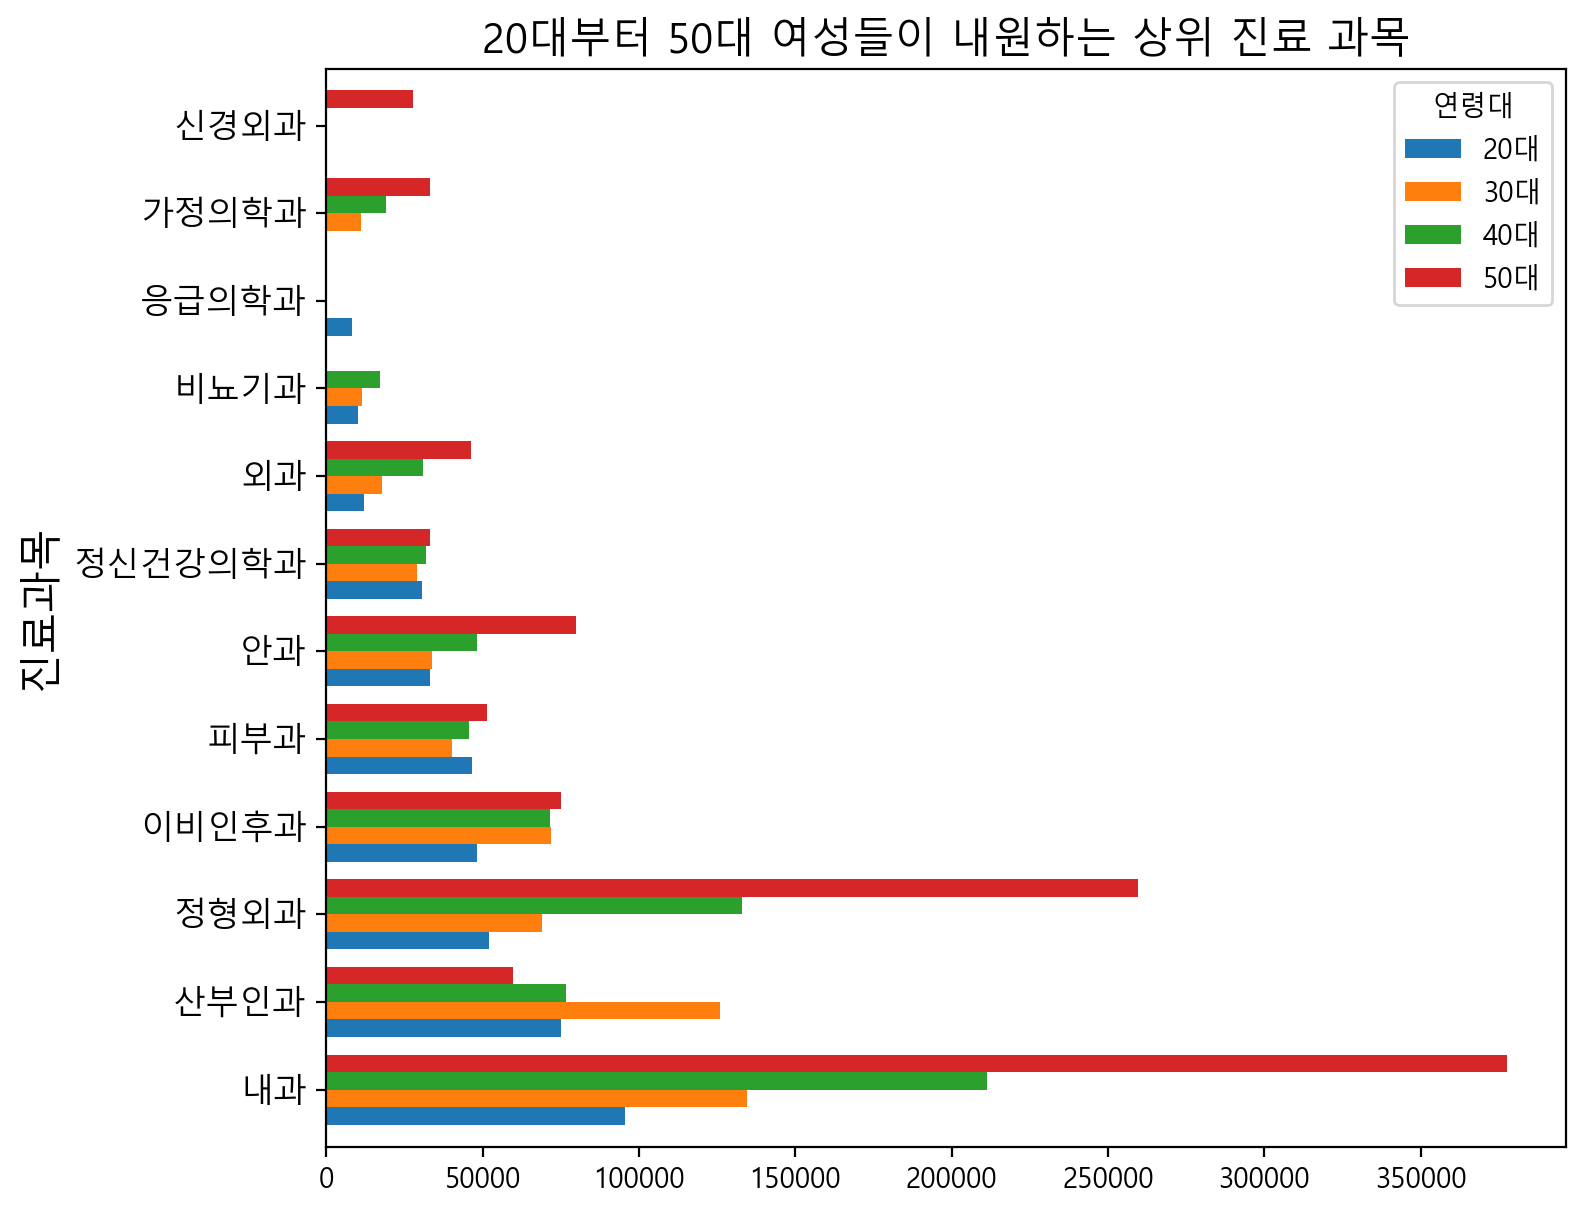

In [24]:
df_bargraph = df_female_ca_2050.sort_values(by='20ÎåÄ', ascending=False)
df_bargraph.set_index('ÏßÑÎ£åÍ≥ºÎ™©', inplace=True)

df_bargraph.plot.barh(figsize=(8,7), width=0.8)
plt.yticks(fontsize=12)
plt.ylabel("ÏßÑÎ£åÍ≥ºÎ™©", fontsize=15)
plt.title("20ÎåÄÎ∂ÄÌÑ∞ 50ÎåÄ Ïó¨ÏÑ±Îì§Ïù¥ ÎÇ¥ÏõêÌïòÎäî ÏÉÅÏúÑ ÏßÑÎ£å Í≥ºÎ™©", fontsize=15)

In [25]:
diag_data_s = df_female[df_female['ÏßÑÎ£åÍ≥ºÎ™©']=='Ï†ïÌòïÏô∏Í≥º']

diag_data_s_ca = pd.pivot_table(data=diag_data_s, values='ÏßÑÎ£åÍ≥ºÎ™©', aggfunc='count', index='ÏßÑÎã®Î≥ëÎ™Ö', columns='Ïó∞Î†πÎåÄ')
diag_data_s_ca.sort_values(by='30ÎåÄ', ascending=False)[:15].style.background_gradient(cmap='summer')